In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
data = pd.read_csv(r"C:\Users\athar\Downloads\py-master\py-master\DeepLearningML\11_chrun_prediction\customer_churn.csv")

In [4]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [5]:
data.drop(["customerID"],axis=1,inplace=True)

In [10]:
for i in data:
    print(i,":",data[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [15]:
data["gender"].replace({"Male" : 1, "Female":0}, inplace=True)
data["MultipleLines"].replace({"No phone service" : "No"}, inplace=True)

no_internet_service_cols = [
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

for i in no_internet_service_cols:
    data[i].replace({'No internet service':'No'},inplace=True)

yes_no_cols = ["Partner","Dependents","PhoneService","MultipleLines",'OnlineSecurity',
               'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
               'StreamingMovies','PaperlessBilling','Churn']

for i in yes_no_cols:
    data[i].replace({"Yes" : 1, "No" : 0}, inplace=True)

In [18]:
cols_to_be_encoded = ['InternetService','Contract','PaymentMethod']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cols_to_be_encoded:
    data[i] = le.fit_transform(data[i])

In [20]:
for i in data:
    print(i,":",data[i].unique())

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : [0 1 2]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : [0 1 2]
PaperlessBilling : [1 0]
PaymentMethod : [2 3 0 1]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]


In [32]:
data = data[data['TotalCharges']!=" "]
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [35]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [37]:
cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for i in cols_to_scale:
    data[i] = scaler.fit_transform(data[[i]])

In [38]:
data[cols_to_scale].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,0.442560,0.463166,0.261309
std,0.345708,0.299363,0.261571
min,0.000000,0.000000,0.000000
25%,0.112676,0.172512,0.044155
50%,0.394366,0.518408,0.159090
75%,0.760563,0.712562,0.435719
max,1.000000,1.000000,1.000000


In [39]:
data["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [40]:
X = data.drop(["Churn"],axis=1)
X.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.0,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275


In [41]:
y = data["Churn"]
y.head(1)

0    0
Name: Churn, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [45]:
X_train.shape

(8260, 19)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,stratify=y_sm,random_state=42)

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (19,)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics= ['accuracy']
)

model.fit(X_train,y_train,epochs=200, batch_size = 8)

Epoch 1/200
1033/1033 [==============================] - 2s 1ms/step - loss: 0.7174 - accuracy: 0.5206
Epoch 2/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.6804 - accuracy: 0.5781
Epoch 3/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.6590 - accuracy: 0.6317
Epoch 4/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.6382 - accuracy: 0.6599
Epoch 5/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.6292 - accuracy: 0.6696
Epoch 6/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.6162 - accuracy: 0.6874
Epoch 7/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.6099 - accuracy: 0.6912
Epoch 8/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.6058 - accuracy: 0.6983
Epoch 9/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.6014 - accuracy: 0.7029
Epoch 10/200
1033/1033 [==============================] - 1s 1ms/step - l

1033/1033 [==============================] - 1s 1ms/step - loss: 0.5651 - accuracy: 0.7282
Epoch 80/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5604 - accuracy: 0.7303
Epoch 81/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5622 - accuracy: 0.7308
Epoch 82/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.7303
Epoch 83/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5675 - accuracy: 0.7304
Epoch 84/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5668 - accuracy: 0.7289
Epoch 85/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5688 - accuracy: 0.7301
Epoch 86/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5635 - accuracy: 0.7274
Epoch 87/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5669 - accuracy: 0.7304
Epoch 88/200
1033/1033 [==============================] - 1s 1ms/step - loss:

1033/1033 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7406
Epoch 158/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7479
Epoch 159/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7390
Epoch 160/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5565 - accuracy: 0.7374
Epoch 161/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7404
Epoch 162/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.7390
Epoch 163/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7400
Epoch 164/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5616 - accuracy: 0.7337
Epoch 165/200
1033/1033 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7426
Epoch 166/200
1033/1033 [==============================] - 1s 1ms/ste

In [58]:
model.evaluate(X_test,y_test)

65/65 [==============================] - 0s 953us/step - loss: 0.4892 - accuracy: 0.7957


[0.489159494638443, 0.79574054479599]

In [63]:
yp = model.predict(X_test)

65/65 [==============================] - 0s 766us/step


In [64]:
y_pred = []

for i in yp:
    if i < 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1033
           1       0.80      0.78      0.79      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



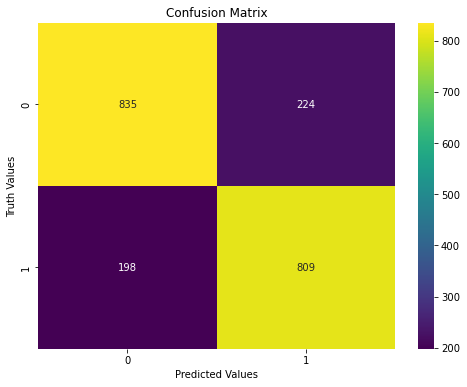

In [78]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(8,6));
sns.heatmap(cm,annot=True, fmt='d',cmap='viridis');
plt.xlabel("Predicted Values");
plt.ylabel("Truth Values");
plt.title("Confusion Matrix");